In [2]:
# !pip install --upgrade tensorflow_hub
# !pip install --upgrade pytorch
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

print(tf.__version__)

2.4.1


Dimensions = 640.0 x 480.0


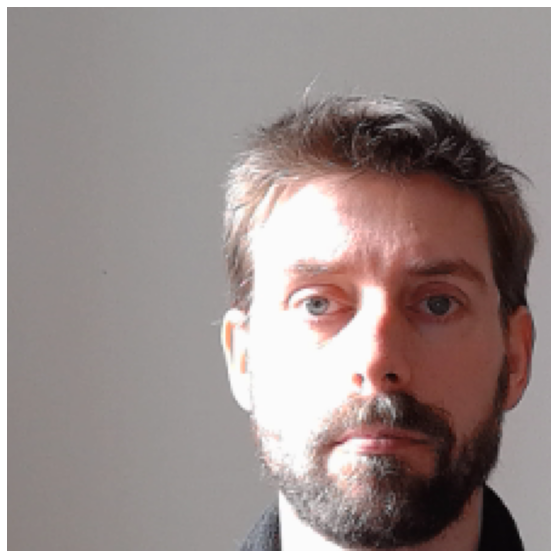

In [99]:
import cv2
import matplotlib.pyplot as plt

vc = cv2.VideoCapture(0)

plt.figure(figsize=(10,10))
plt.axis("off")

if vc.isOpened(): # try to get the first frame
    _, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    frame = frame[100:224+100, 100:224+100] 
    plt.imshow(frame); 
    width = vc.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = vc.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print(f"Dimensions = {width} x {height}")
    
else:
    is_capturing = False

vc.release()

In [115]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="mobilenet_v1_1.0_224_quant.tflite")
interpreter.allocate_tensors()

In [116]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [117]:
#Preprocess the image to required size and cast
input_shape = input_details[0]['shape']
input_tensor= np.array(np.expand_dims(frame,0), dtype=np.uint8)

In [118]:
input_index = interpreter.get_input_details()[0]["index"]
interpreter.set_tensor(input_index, input_tensor)
#interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
#output_data = interpreter.get_tensor(output_details[0]['index'])
#print(output_data)

In [128]:
#Run the inference
interpreter.invoke()
output_details = interpreter.get_output_details()[0]
output = np.squeeze(interpreter.get_tensor(output_details['index']))

In [130]:
if output_details['dtype'] == np.uint8:
    scale, zero_point = output_details['quantization']
    output = scale * (output - zero_point)

In [135]:
ordered = np.argpartition(-output, top_k)

In [136]:
def load_labels(path):
  with open(path, 'r') as f:
    return {i: line.strip() for i, line in enumerate(f.readlines())}
labels = load_labels("labels_mobilenet_quant_v1_224.txt")

In [134]:
labels[ordered[0]]

'suit'

In [127]:
top_k

array([  0, 627, 628, ..., 456, 458, 835])